In [9]:

# 덴마 평점 분석하기 
from bs4 import BeautifulSoup
import urllib.request as req

list = []
list2 = []
titleList = []

count = 0
countLists = []

#총 420여화 
for page in range(142):
    no = str(page+1)
    url='https://comic.naver.com/webtoon/list.nhn?titleId=119874&page='+no
    res =req.urlopen(url)
    
    
    
    soup = BeautifulSoup(res,'html.parser')
    stars = soup.select("div.rating_type > strong") 
    days = soup.select("table.viewList td.num")
    titles = soup.select("table > tr > td.title > a")
    
    for star in stars :
        count += 1
        list.append(star.string)
        countLists.append(count)
        
        
    for day in days :
        list2.append(day.string)
        
    for title in titles :
        titleList.append(title.string)
        
print(list[0])
print(list2[0])

#for ulrlist
#data 가져오기

import pandas as pd
# csv 만들기
df = pd.DataFrame(data=countLists, columns=['NO'])
df['stars'] = pd.Series(list)
df['title'] = pd.Series(titleList)
df['day'] = pd.Series(list2)


df.to_csv("../data/webtoon2.csv", encoding ="utf-8", index=False)
pd.read_csv("../data/webtoon2.csv")

2.13
2019.12.29


,NO,stars,title,day
0,1,2.13,3-414화 2.에필로그(5-2),2019.12.29
1,2,5.11,3-413화 2.에필로그(5-1),2019.12.27
2,3,6.31,3-412화 2.에필로그(4-9),2019.12.25
3,4,6.24,3-411화 2.에필로그(4-8),2019.12.24
4,5,5.05,3-410화 2.에필로그(4-7),2019.12.22
...,...,...,...,...
1409,1410,9.46,5화 해적선장 하독(1),2010.01.17
1410,1411,9.53,4화 파마나의 개(4),2010.01.15
1411,1412,9.38,3화 파마나의 개(3),2010.01.11
1412,1413,9.27,2화 파마나의 개(2),2010.01.10


In [10]:
WebToon_Read = pd.read_csv("../data/webtoon2.csv")

In [28]:
WebToon_Read.sort_values(by=("stars"), ascending=True).head(30)

,NO,stars,title,day
0,1,2.13,3-414화 2.에필로그(5-2),2019.12.29
6,7,3.93,3-408화 2.에필로그(4-5),2019.12.19
5,6,4.31,3-409화 2.에필로그(4-6),2019.12.20
698,699,4.40,2-394화 2.콴의 냉장고(181),2015.07.06
8,9,4.62,3-406화 2.에필로그(4-3),2019.12.11
7,8,4.93,3-407화 2.에필로그(4-4),2019.12.16
4,5,5.05,3-410화 2.에필로그(4-7),2019.12.22
1,2,5.11,3-413화 2.에필로그(5-1),2019.12.27
699,700,5.11,2-393화 2.콴의 냉장고(180),2014.07.29
20,21,5.30,3-394화 2.에필로그(3-20),2019.11.13


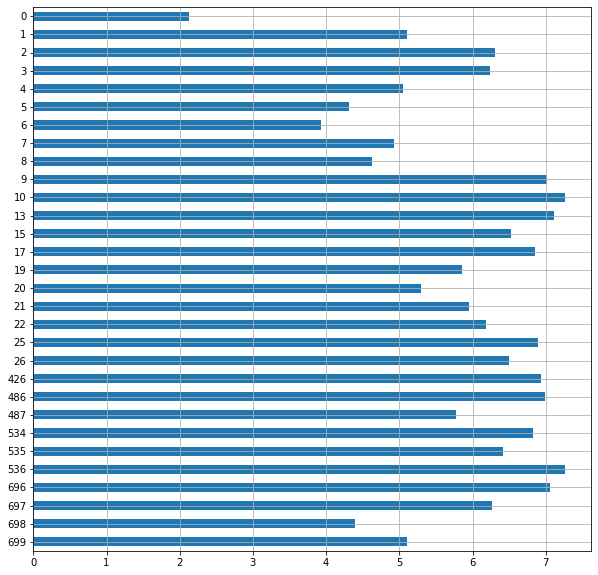

In [29]:
upperList2 = upperList.sort_values(by=("day"), ascending=True)
upperList2["stars"].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [31]:
WebToon_Read.sort_values(by=("stars"), ascending=False).head(30)

,NO,stars,title,day
1271,1272,9.91,143화 식스틴(56),2010.12.05
924,925,9.90,2-168화 a catnap(168),2013.02.21
903,904,9.89,2-189화 S.E. 라미레코드(4),2013.04.04
897,898,9.89,2-195화 2.A.E(6),2013.04.15
909,910,9.89,2-183화 1.A.E(12),2013.03.28
919,920,9.89,2-173화 1.A.E(2),2013.03.04
907,908,9.89,2-185화 1.A.E(14),2013.04.01
1117,1118,9.89,297화 God's lover(102),2011.11.28
914,915,9.89,2-178화 1.A.E(7),2013.03.16
1104,1105,9.89,310화 God's lover(115),2011.12.30
